In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df1 = pd.read_csv("games_metadata_profile.csv")
df2 = pd.read_csv("games_metadata_profile_2024_01.csv")

df = pd.concat([df1, df2], ignore_index=True)

<Axes: >

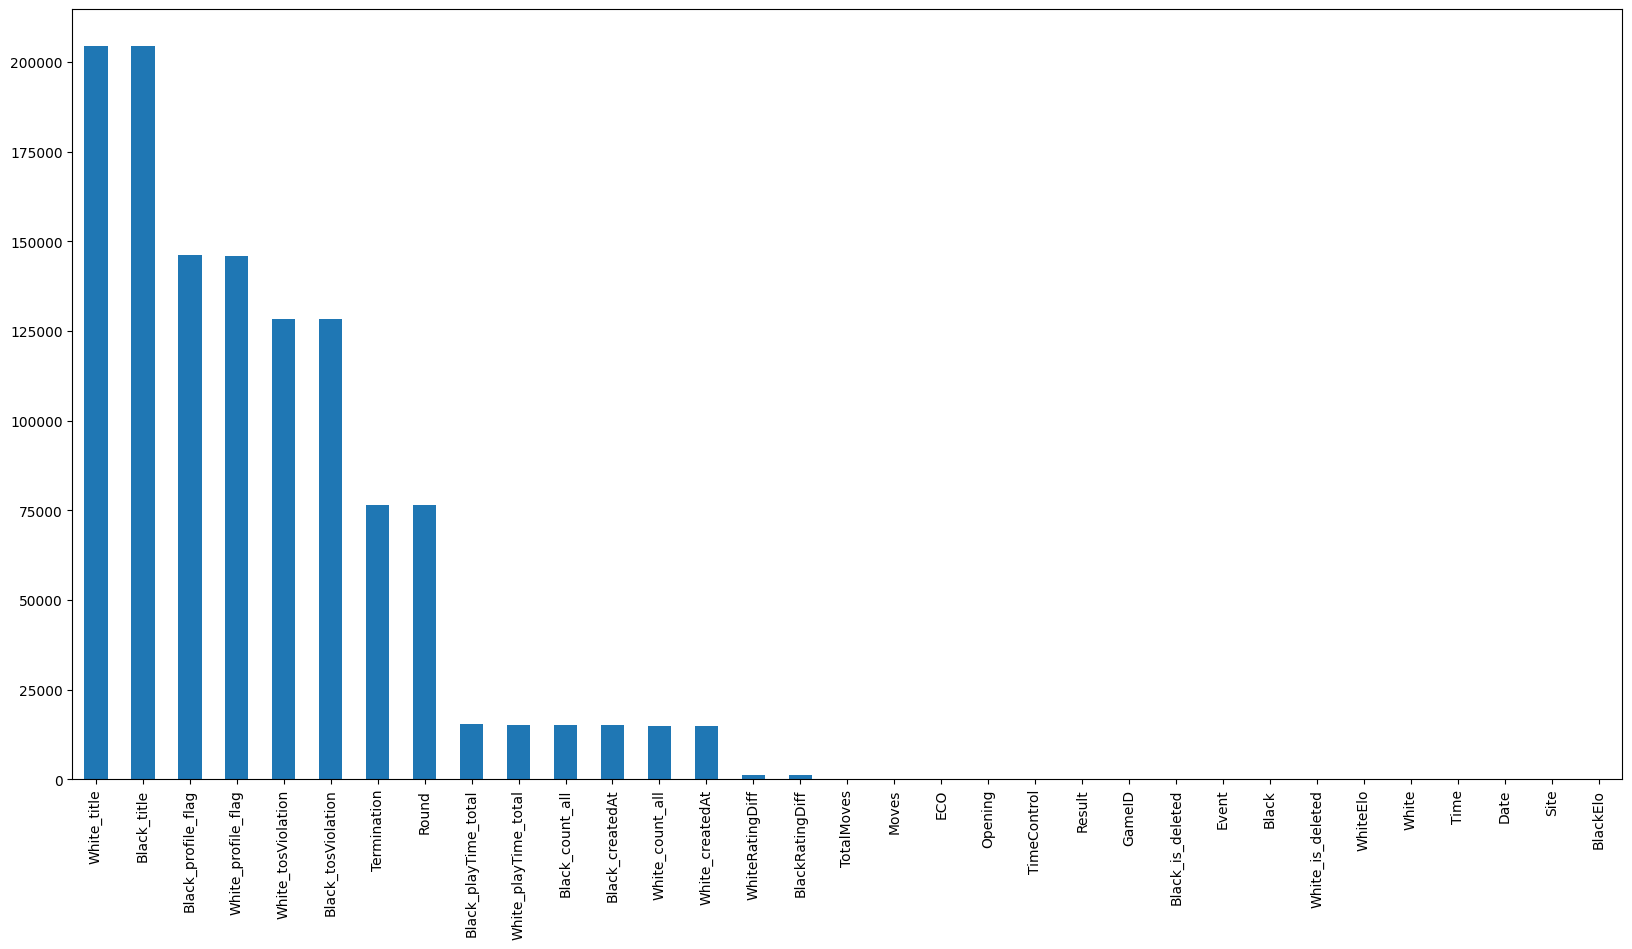

In [3]:
df.isnull().sum().sort_values(ascending=False).plot(kind="bar", figsize=(20, 10))

# One record sample

In [4]:
sample_idx = 100

In [5]:
df.iloc[sample_idx]

GameID                                                                101
Event                                                Rated Classical game
Site                                         https://lichess.org/1dPWOCTb
Date                                                           2017.04.30
Time                                                             22:58:53
White                                                              Butron
WhiteElo                                                             1875
WhiteRatingDiff                                                      -7.0
White_is_deleted                                                    False
White_tosViolation                                                  False
White_profile_flag                                                     ES
White_createdAt                                           1438109116690.0
White_playTime_total                                            8394311.0
White_count_all                       

In [6]:
sample_pnq = df.iloc[sample_idx]["Moves"]

sample_pnq

'd4 {[%eval 0.15] [%clk 0:10:00]} e6 {[%eval 0.34] [%clk 0:10:00]} a3 {[%eval 0.07] [%clk 0:09:57]} c5 {[%eval -0.02] [%clk 0:09:52]} d5 {[%eval -0.43] [%clk 0:09:53]} Nf6?! {[%eval 0.12] [%clk 0:09:49]} Bg5?! {[%eval -0.48] [%clk 0:09:44]} Qb6 {[%eval -0.15] [%clk 0:09:08]} Bxf6 {[%eval -0.16] [%clk 0:09:36]} gxf6 {[%eval -0.06] [%clk 0:09:06]} b3 {[%eval -0.16] [%clk 0:09:34]} Bg7 {[%eval -0.08] [%clk 0:08:58]} c3 {[%eval -0.36] [%clk 0:09:06]} O-O {[%eval -0.31] [%clk 0:08:53]} Nf3?! {[%eval -0.81] [%clk 0:08:56]} Na6 {[%eval -0.5] [%clk 0:08:21]} e3 {[%eval -0.78] [%clk 0:08:53]} Nc7 {[%eval -0.61] [%clk 0:08:19]} c4 {[%eval -0.71] [%clk 0:08:49]} f5 {[%eval -0.53] [%clk 0:08:11]} Ra2 {[%eval -0.6] [%clk 0:08:46]} Qd6?! {[%eval 0.02] [%clk 0:07:39]} Be2 {[%eval -0.29] [%clk 0:08:13]} b5 {[%eval 0.0] [%clk 0:07:34]} O-O {[%eval 0.04] [%clk 0:08:09]} Bb7?! {[%eval 0.72] [%clk 0:07:28]} dxe6 {[%eval 0.6] [%clk 0:07:55]} Qxe6 {[%eval 0.69] [%clk 0:07:03]} cxb5 {[%eval 0.59] [%clk 0:07:

In [7]:
import chess
import chess.pgn
from chess.pgn import BaseVisitor
import io


class Visitor(BaseVisitor):
    def __init__(self):
        self.comments = []
        self.moves = []

    def visit_comment(self, comment: str) -> None:
        self.comments.append(comment)

    def visit_move(self, board: chess.Board, move: chess.Move) -> None:
        self.moves.append(move)

    def result(self):
        return self.moves, self.comments


moves, comments = chess.pgn.read_game(io.StringIO(sample_pnq), Visitor=Visitor) 

print(comments)
print(moves)

['[%eval 0.15] [%clk 0:10:00]', '[%eval 0.34] [%clk 0:10:00]', '[%eval 0.07] [%clk 0:09:57]', '[%eval -0.02] [%clk 0:09:52]', '[%eval -0.43] [%clk 0:09:53]', '[%eval 0.12] [%clk 0:09:49]', '[%eval -0.48] [%clk 0:09:44]', '[%eval -0.15] [%clk 0:09:08]', '[%eval -0.16] [%clk 0:09:36]', '[%eval -0.06] [%clk 0:09:06]', '[%eval -0.16] [%clk 0:09:34]', '[%eval -0.08] [%clk 0:08:58]', '[%eval -0.36] [%clk 0:09:06]', '[%eval -0.31] [%clk 0:08:53]', '[%eval -0.81] [%clk 0:08:56]', '[%eval -0.5] [%clk 0:08:21]', '[%eval -0.78] [%clk 0:08:53]', '[%eval -0.61] [%clk 0:08:19]', '[%eval -0.71] [%clk 0:08:49]', '[%eval -0.53] [%clk 0:08:11]', '[%eval -0.6] [%clk 0:08:46]', '[%eval 0.02] [%clk 0:07:39]', '[%eval -0.29] [%clk 0:08:13]', '[%eval 0.0] [%clk 0:07:34]', '[%eval 0.04] [%clk 0:08:09]', '[%eval 0.72] [%clk 0:07:28]', '[%eval 0.6] [%clk 0:07:55]', '[%eval 0.69] [%clk 0:07:03]', '[%eval 0.59] [%clk 0:07:44]', '[%eval 1.19] [%clk 0:06:51]', '[%eval 0.79] [%clk 0:07:38]', '[%eval 1.69] [%clk 0:06

8/8/8/5p2/5p2/5Pp1/6P1/5k1K w - - 5 64


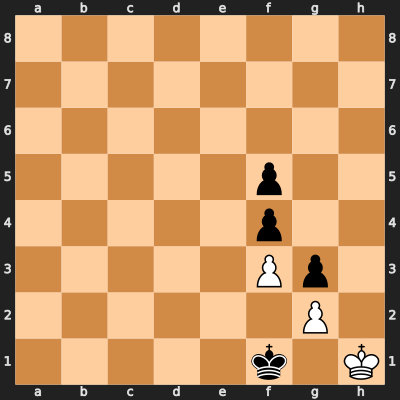

In [30]:
from IPython.display import clear_output
import chess.svg
from time import sleep

# render board after each move
board = chess.Board()

for move in moves:
    clear_output(wait=True)
    board.push(move)
    print(board.fen())
    display(chess.svg.board(board=board, size=400))
    sleep(1)

In [36]:
# render progress bar
from tqdm import tqdm

move_dict = dict()

for idx, row in tqdm(df.iterrows(), total=len(df)):
    board = chess.Board()
    moves, _ = chess.pgn.read_game(io.StringIO(row["Moves"]), Visitor=Visitor)
    for move in moves:
        board_code = " ".join(board.fen().split(" ")[:2])
        move_code = move.uci()

        if board_code not in move_dict:
            move_dict[board_code] = {}

        if move.uci() not in move_dict[board_code]:
            move_dict[board_code][move_code] = 0
        move_dict[board_code][move_code] += 1
        board.push(move)

  0%|          | 1001/207479 [00:03<11:52, 289.67it/s]


# Basic EDA


In [22]:
df.describe()

,GameID,WhiteElo,WhiteRatingDiff,White_createdAt,White_playTime_total,White_count_all,BlackElo,BlackRatingDiff,Black_createdAt,Black_playTime_total,Black_count_all,TotalMoves
count,207479.000000,207479.000000,206381.000000,1.924880e+05,1.922670e+05,1.924880e+05,207479.000000,206381.000000,1.923950e+05,1.921870e+05,1.923950e+05,207479.000000
mean,42494.767996,1621.329942,3.394353,1.571061e+12,3.209684e+06,1.135688e+04,1622.131324,2.623807,1.570989e+12,3.274607e+06,1.155510e+04,65.364143
std,42481.570355,374.661195,34.648009,9.484643e+10,8.023828e+06,2.716456e+04,375.050861,30.943048,9.466747e+10,9.547717e+06,2.997191e+04,27.339966
min,1.000000,400.000000,-700.000000,1.290416e+12,0.000000e+00,1.000000e+00,400.000000,-700.000000,1.290416e+12,0.000000e+00,1.000000e+00,5.000000
25%,3990.500000,1368.000000,-6.000000,1.485076e+12,4.014670e+05,1.020000e+03,1367.000000,-7.000000,1.484936e+12,4.088855e+05,1.039000e+03,47.000000
50%,27183.000000,1614.000000,1.000000,1.584642e+12,1.480612e+06,4.112000e+03,1617.000000,-1.000000,1.584742e+12,1.490795e+06,4.146000e+03,60.000000
75%,79052.500000,1870.000000,8.000000,1.664551e+12,4.023118e+06,1.261000e+04,1870.000000,7.000000,1.664105e+12,4.072910e+06,1.281250e+04,79.000000
max,130922.000000,3233.000000,710.000000,1.706743e+12,6.628044e+08,1.775580e+06,3198.000000,710.000000,1.706745e+12,6.628044e+08,1.775580e+06,332.000000


<Axes: ylabel='Frequency'>

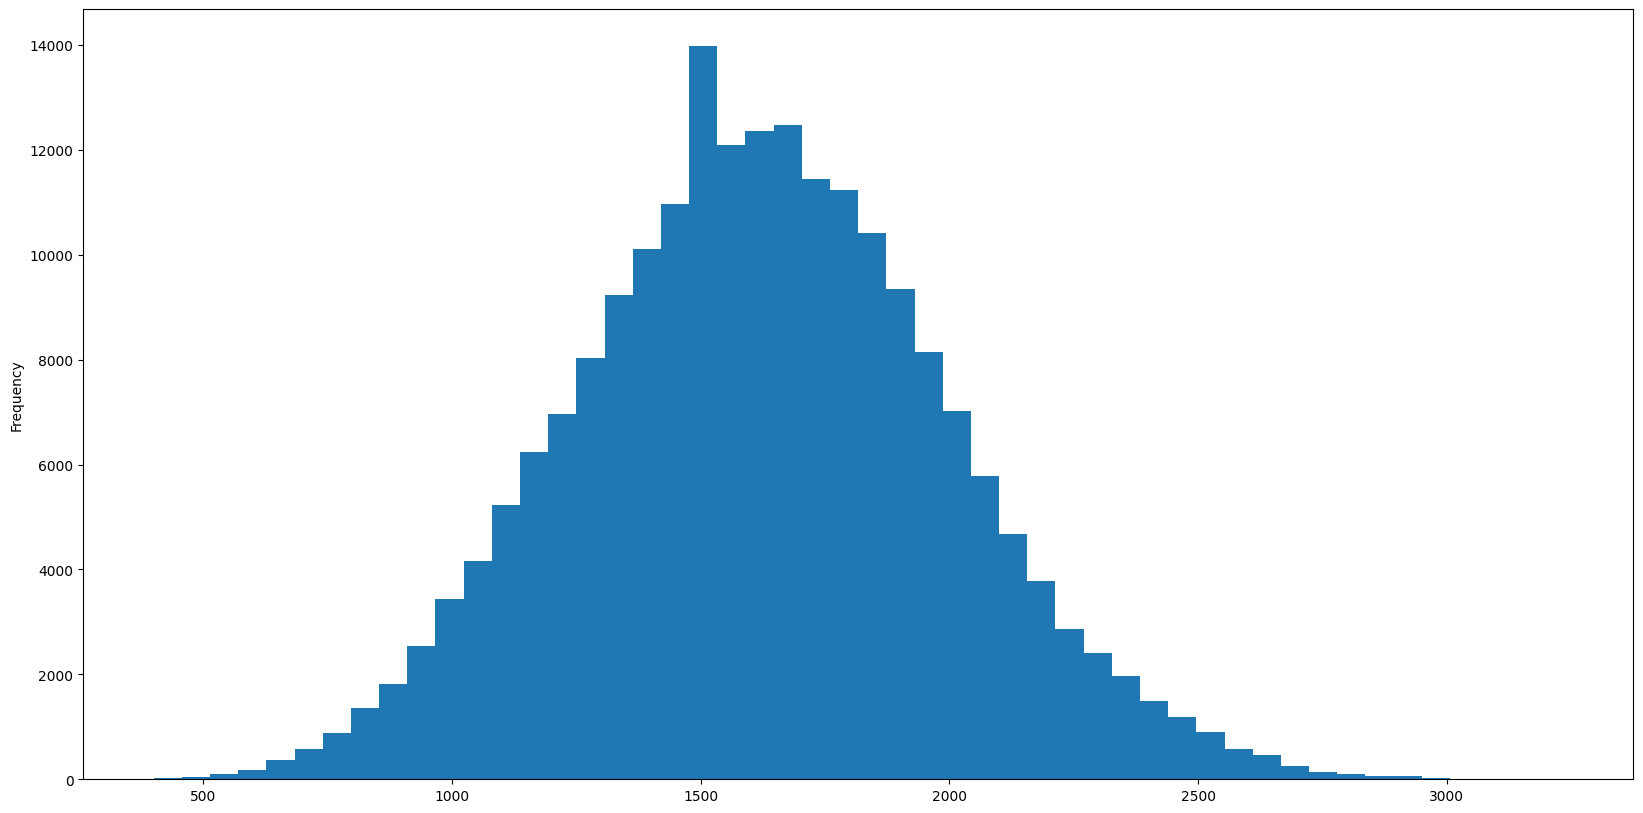

In [26]:
# distribution of elo ratings

df["WhiteElo"].plot(kind="hist", bins=50, figsize=(20, 10))

<Axes: ylabel='Frequency'>

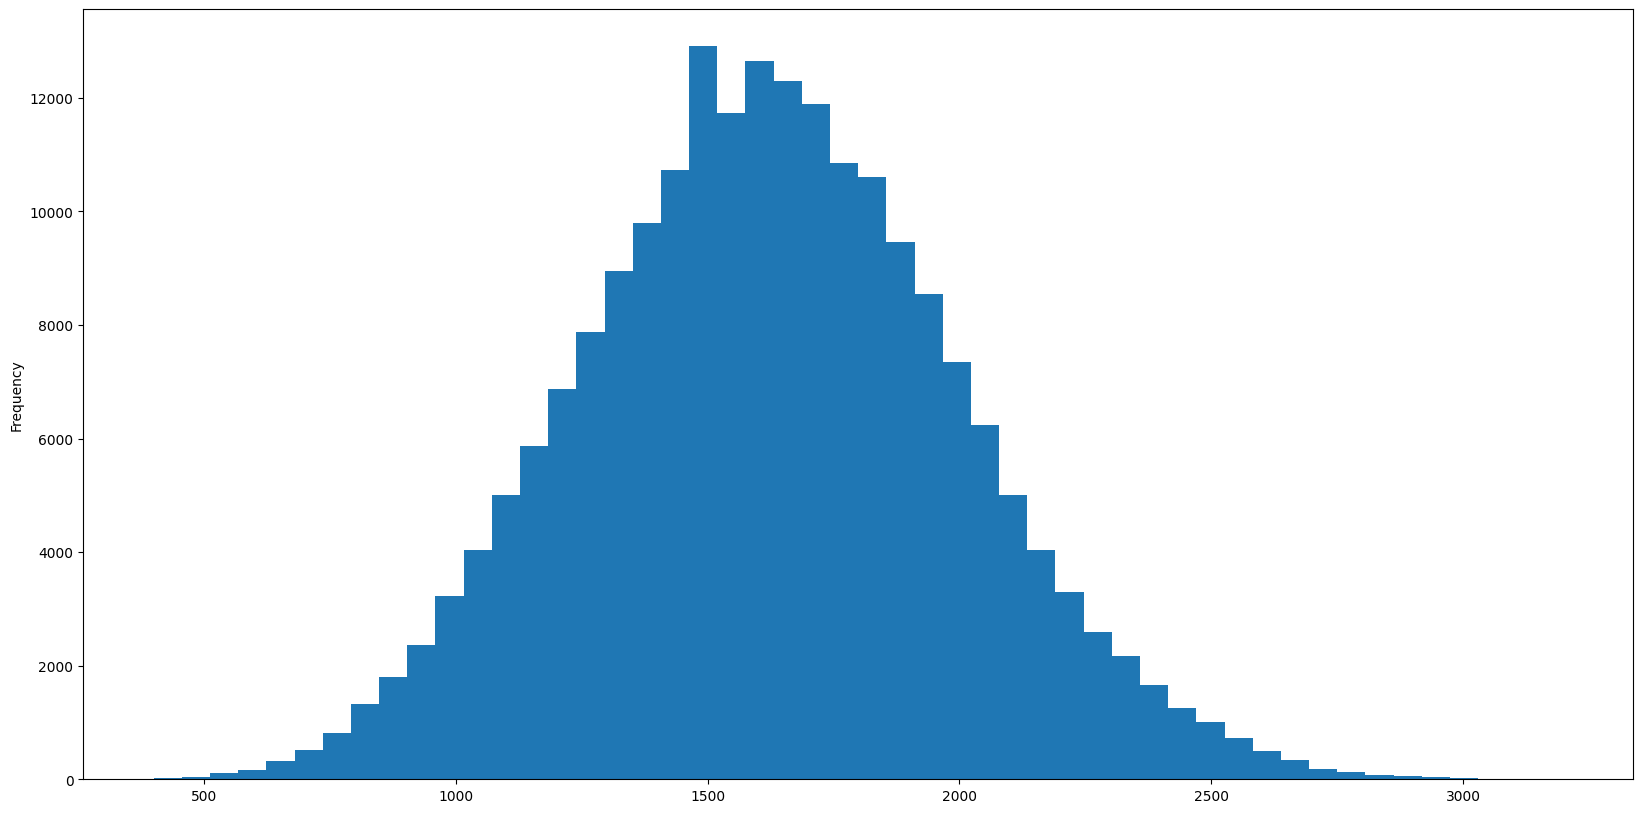

In [27]:
df["BlackElo"].plot(kind="hist", bins=50, figsize=(20, 10))

<Axes: xlabel='Result'>

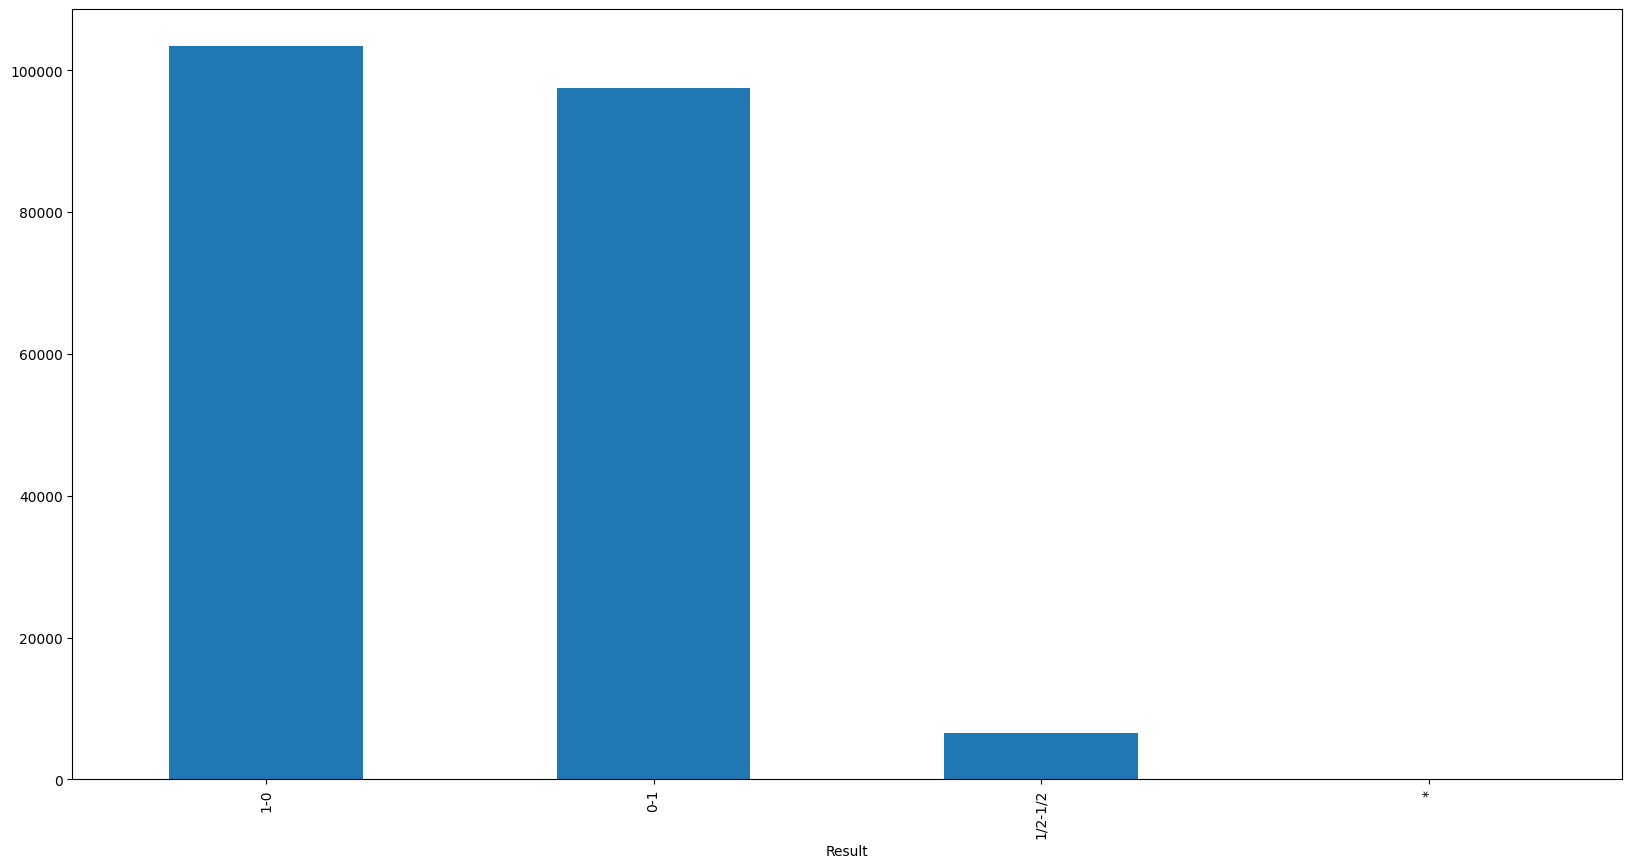

In [30]:
df["Result"].value_counts().plot(kind="bar", figsize=(20, 10))